# PROYECTO 2

## Sentiment & Emotions Labelled Tweets

## Resultados y Conclusiones.

Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle as pkl
from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder

import unicodedata

import warnings
warnings.filterwarnings("ignore")

# Normalización
from sklearn.preprocessing import MinMaxScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Validacion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

# SMOTE
from imblearn.over_sampling import SMOTE

from collections import Counter

In [2]:
with open("data/x_scaler_sentimiento.pkl", "br") as file:
    x_scaler_sentimiento = pkl.load(file)
    
with open("data/x_scaler_emocion.pkl", "br") as file:
    x_scaler_emocion = pkl.load(file)

In [3]:
with open("data/mejor_modelo_sentimiento.pkl", "br") as file:
    model_sentimiento = pkl.load(file)
    
with open("data/mejor_modelo_emocion.pkl", "br") as file:
    model_emocion = pkl.load(file)
    
print(f"Mejor Clasificador RandomForest para el SENTIMIENTO:\n{model_sentimiento.get_params()}")
print("---" * 30)
print(f"Mejor Clasificador RandomForest para la EMOCIÓN:\n{model_emocion.get_params()}")

Mejor Clasificador RandomForest para el SENTIMIENTO:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 550, 'max_features': 'sqrt', 'max_leaf_nodes': 6200, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
------------------------------------------------------------------------------------------
Mejor Clasificador RandomForest para la EMOCIÓN:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 350, 'max_features': 'sqrt', 'max_leaf_nodes': 7500, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [4]:
df_5perc = pd.read_csv("data/df_5perc.csv")

df_5perc

,Sentimientos,Emociones,@,#,len_text,polarity,subjectivity,abandon,abbey,abbot,...,zip,zipcod,zippo,zone,zoom,zoomer,zschaep,zuberi,zuck,zuckerberg
0,0,0,3,1,16,-0.200000,0.600000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,0,8,-1.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,3,0,20,-0.291667,0.541667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,3,0,22,-0.450000,0.550000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,4,0,24,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0,0,3,0,24,-1.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,2,3,3,0,12,0.350000,0.644444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,1,1,2,0,2,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,1,1,10,0,10,0.350000,0.650000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# PREDICCIÓN PARA EL SENTIMIENTO

X_sentimiento = df_5perc.copy()

X_sentimiento.drop(["Sentimientos", "Emociones"], axis = 1, inplace = True)

X_sentimiento = x_scaler_sentimiento.transform(X_sentimiento)

yhat_sentimiento = model_sentimiento.predict(X_sentimiento)
yhat_proba_sentimiento = model_sentimiento.predict_proba(X_sentimiento)

print(f"yhat (sentmiento):\n{yhat_sentimiento}")
print("---" * 30)
print(f"yhat_proba (sentmiento):\n{yhat_proba_sentimiento}")

yhat (sentmiento):
[0. 0. 0. ... 1. 1. 0.]
------------------------------------------------------------------------------------------
yhat_proba (sentmiento):
[[0.69085795 0.09884168 0.21030037]
 [0.93000052 0.04010851 0.02989097]
 [0.95963838 0.02912963 0.01123199]
 ...
 [0.12476508 0.76128134 0.11395358]
 [0.33720799 0.45637316 0.20641885]
 [0.56833664 0.11766508 0.31399828]]


In [6]:
# PREDICCIÓN PARA LA EMOCIÓN

X_emocion = df_5perc.copy()

X_emocion.drop(["Sentimientos", "Emociones"], axis = 1, inplace = True)

X_emocion = x_scaler_emocion.transform(X_emocion)

yhat_emocion = model_emocion.predict(X_emocion)
yhat_proba_emocion = model_emocion.predict_proba(X_emocion)

print(f"yhat (emoción):\n{yhat_emocion}")
print("---" * 30)
print(f"yhat_proba (emoción):\n{yhat_proba_emocion}")

yhat (emoción):
[0. 0. 0. ... 1. 0. 0.]
------------------------------------------------------------------------------------------
yhat_proba (emoción):
[[5.16088007e-01 4.95041930e-02 1.12215799e-01 1.85875967e-01
  6.00226255e-02 7.62934092e-02]
 [8.88680229e-01 1.93160173e-02 5.48980257e-02 1.52061827e-02
  6.06060606e-04 2.12934843e-02]
 [8.09967761e-01 1.97742905e-02 7.20472490e-02 1.07340554e-02
  2.82040182e-02 5.92726255e-02]
 ...
 [6.33163911e-02 4.09774056e-01 1.61847904e-01 3.36904420e-01
  9.89440147e-03 1.82628275e-02]
 [3.42358072e-01 1.46960261e-01 1.23369485e-01 2.96314337e-01
  2.75793003e-02 6.34185444e-02]
 [4.06206170e-01 7.26529027e-02 1.26229095e-01 2.24811701e-01
  7.40516521e-02 9.60484793e-02]]


In [7]:
df_pred = pd.concat([df_5perc.iloc[:,:2],
                     pd.DataFrame(data = yhat_proba_sentimiento, columns = ["Negative", "Neutral", "Positive"]),
                     pd.DataFrame(data = yhat_sentimiento, columns = ["Pred. Sent."]),
                     pd.DataFrame(data = yhat_proba_emocion, columns = ["Anger", "Anticipation", "Disgust", "Joy",
                                                                        "Optimism", "Sadness"]),
                     pd.DataFrame(data = yhat_emocion, columns = ["Pred. Emo."])],
                    axis = 1)

df_pred

,Sentimientos,Emociones,Negative,Neutral,Positive,Pred. Sent.,Anger,Anticipation,Disgust,Joy,Optimism,Sadness,Pred. Emo.
0,0,0,0.690858,0.098842,0.210300,0.0,0.516088,0.049504,0.112216,0.185876,0.060023,0.076293,0.0
1,0,0,0.930001,0.040109,0.029891,0.0,0.888680,0.019316,0.054898,0.015206,0.000606,0.021293,0.0
2,0,0,0.959638,0.029130,0.011232,0.0,0.809968,0.019774,0.072047,0.010734,0.028204,0.059273,0.0
3,0,0,0.902957,0.041096,0.055947,0.0,0.820685,0.004915,0.069967,0.064743,0.014120,0.025569,0.0
4,0,0,0.825076,0.108991,0.065932,0.0,0.736489,0.031766,0.138361,0.042338,0.020966,0.030081,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0,0,0.883657,0.062878,0.053465,0.0,0.764147,0.049378,0.117329,0.018530,0.017604,0.033012,0.0
1224,2,3,0.328565,0.381817,0.289617,1.0,0.122913,0.213311,0.074098,0.383286,0.114531,0.091861,3.0
1225,1,1,0.124765,0.761281,0.113954,1.0,0.063316,0.409774,0.161848,0.336904,0.009894,0.018263,1.0
1226,1,1,0.337208,0.456373,0.206419,1.0,0.342358,0.146960,0.123369,0.296314,0.027579,0.063419,0.0


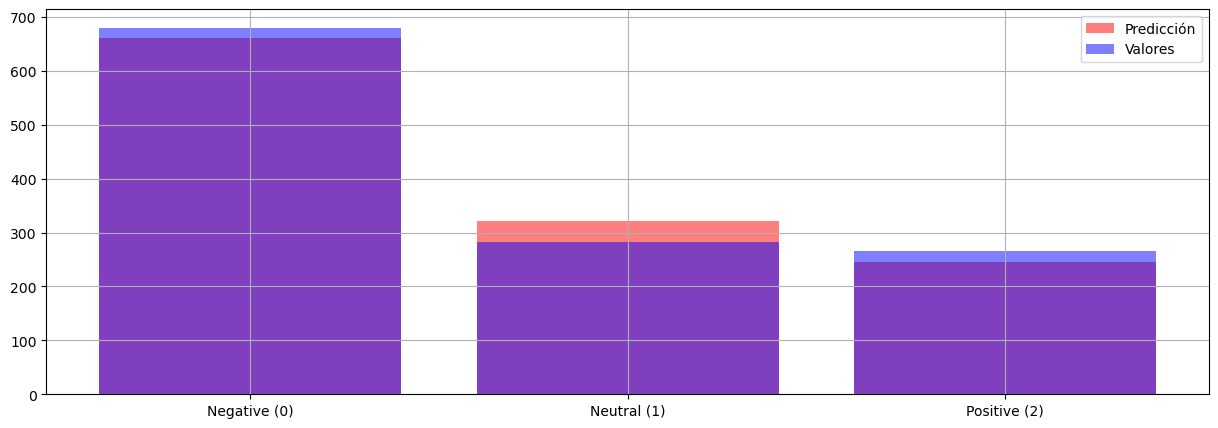

In [8]:
# PREDICCIÓN vs SENTIMIENTO CONOCIDO

fig = plt.figure(figsize = (15, 5))

etiquetas = ["Negative (0)", "Neutral (1)", "Positive (2)"]

plt.bar(etiquetas, df_pred['Pred. Sent.'].value_counts(), alpha = 0.5, color = "red")
plt.bar(etiquetas, df_pred['Sentimientos'].value_counts(), alpha = 0.5, color = "blue")

plt.legend(labels = ["Predicción", "Valores"])

plt.grid()
plt.show()

# Tiende a equivocarse a favor del "Neutral"

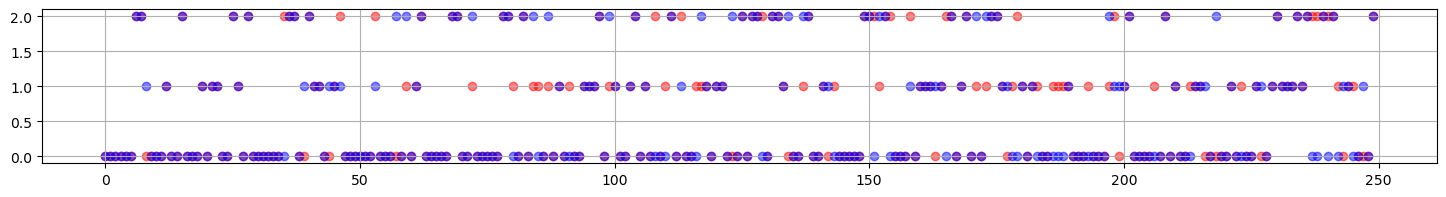

In [9]:
fig = plt.figure(figsize = (18, 2))

plt.scatter(df_pred.index.values[:250], df_pred["Pred. Sent."][:250], color = "red", alpha = 0.5, marker = "o")
plt.scatter(df_pred.index.values[:250], df_pred["Sentimientos"][:250], color = "blue", alpha = 0.5, marker = "o")

plt.grid()
plt.show()

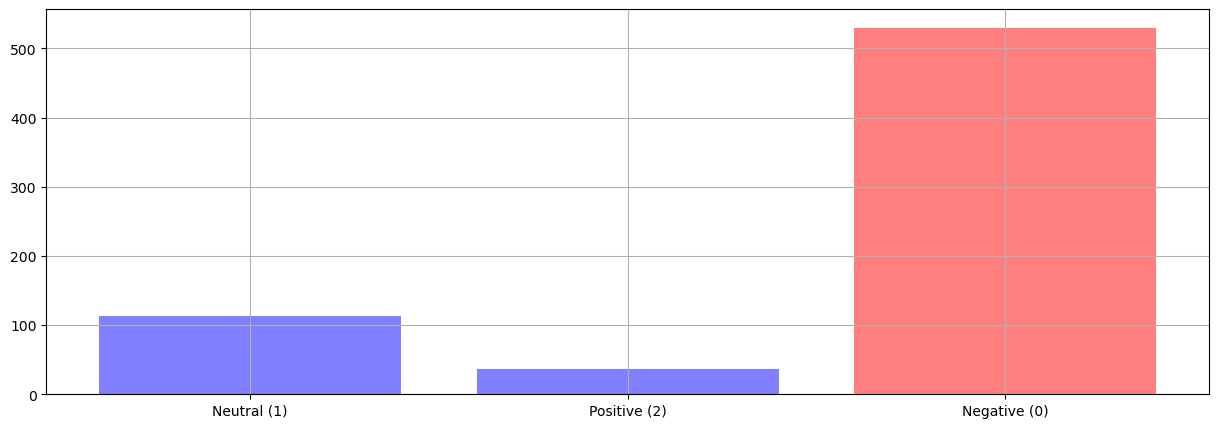

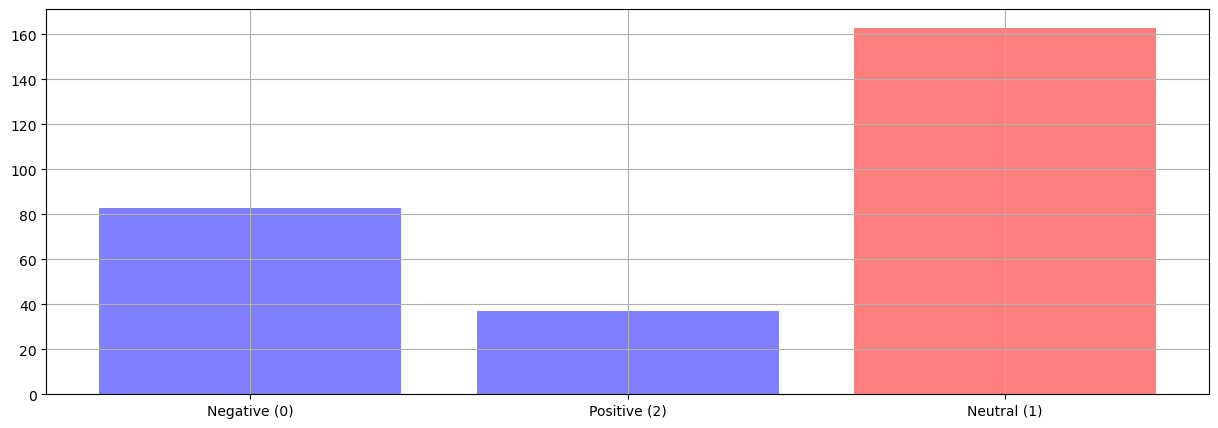

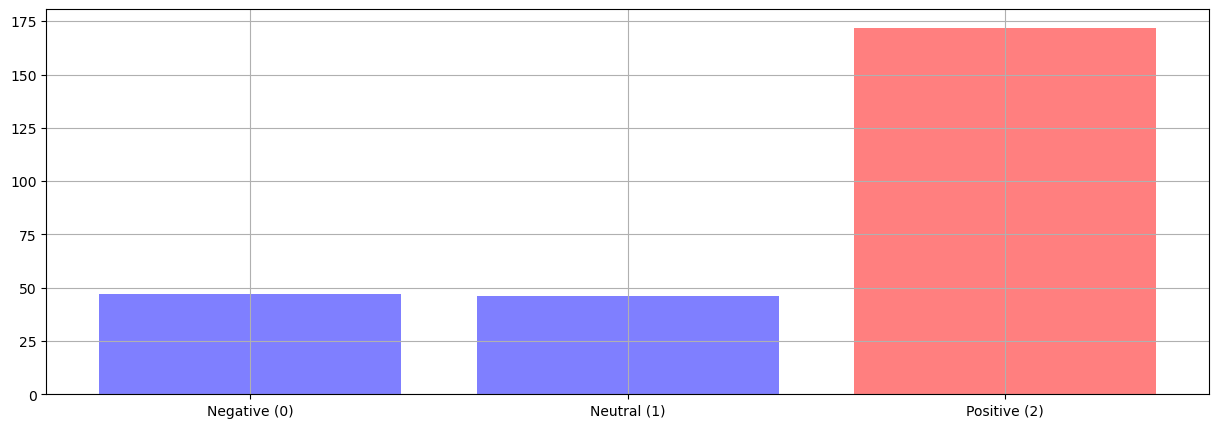

In [10]:
# FALLOS DEL NEGATIVO

fig = plt.figure(figsize = (15, 5))

plt.bar(["Neutral (1)", "Positive (2)"],
        df_pred[(df_pred['Sentimientos'] == 0) & (df_pred["Pred. Sent."] != 0)]["Pred. Sent."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Negative (0)",
        df_pred[(df_pred['Sentimientos'] == 0) & (df_pred["Pred. Sent."] == 0)]["Pred. Sent."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DEL NEUTRO

fig = plt.figure(figsize = (15, 5))

plt.bar(["Negative (0)", "Positive (2)"],
        df_pred[(df_pred['Sentimientos'] == 1) & (df_pred["Pred. Sent."] != 1)]["Pred. Sent."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Neutral (1)",
        df_pred[(df_pred['Sentimientos'] == 1) & (df_pred["Pred. Sent."] == 1)]["Pred. Sent."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DEL POSITIVO

fig = plt.figure(figsize = (15, 5))

plt.bar(["Negative (0)", "Neutral (1)"],
        df_pred[(df_pred['Sentimientos'] == 2) & (df_pred["Pred. Sent."] != 2)]["Pred. Sent."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Positive (2)",
        df_pred[(df_pred['Sentimientos'] == 2) & (df_pred["Pred. Sent."] == 2)]["Pred. Sent."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

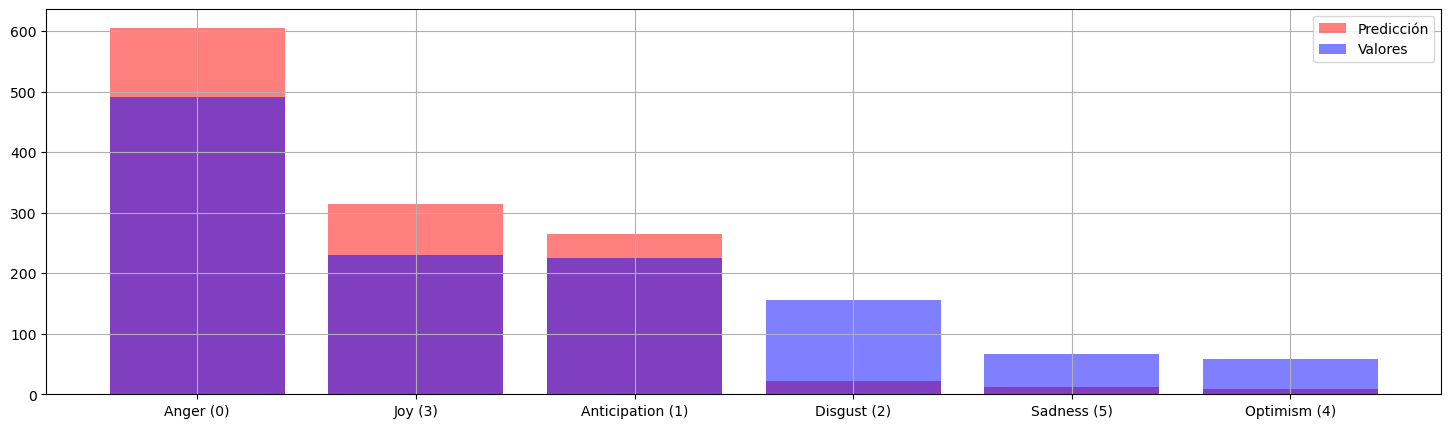

In [11]:
# PREDICCIÓN vs EMOCIÓN CONOCIDA

fig = plt.figure(figsize = (18, 5))

etiquetas = ["Anger (0)", "Joy (3)", "Anticipation (1)", "Disgust (2)", "Sadness (5)", "Optimism (4)"]

plt.bar(etiquetas, df_pred['Pred. Emo.'].value_counts(), alpha = 0.5, color = "red")
plt.bar(etiquetas, df_pred['Emociones'].value_counts(), alpha = 0.5, color = "blue")

plt.legend(labels = ["Predicción", "Valores"])

plt.grid()
plt.show()

# Tiende a equivocarse a favor de las categorías mayoritarias

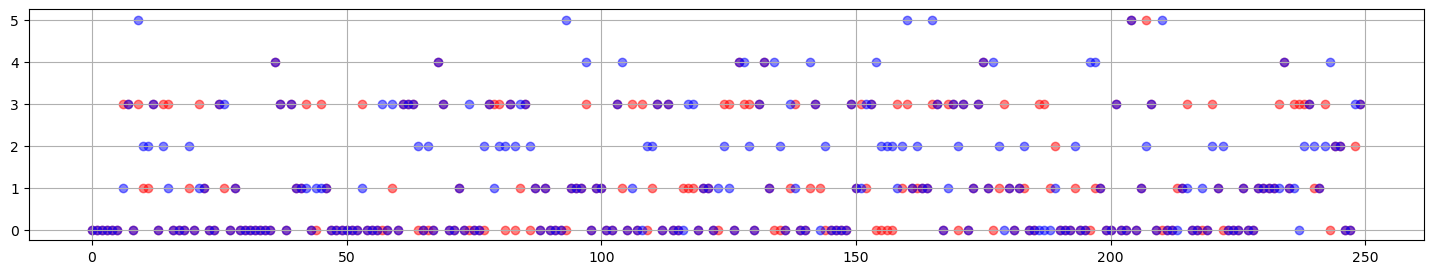

In [12]:
fig = plt.figure(figsize = (18, 3))

plt.scatter(df_pred.index.values[:250], df_pred["Pred. Emo."][:250], color = "red", alpha = 0.5, marker = "o")
plt.scatter(df_pred.index.values[:250], df_pred["Emociones"][:250], color = "blue", alpha = 0.5, marker = "o")

plt.grid()
plt.show()

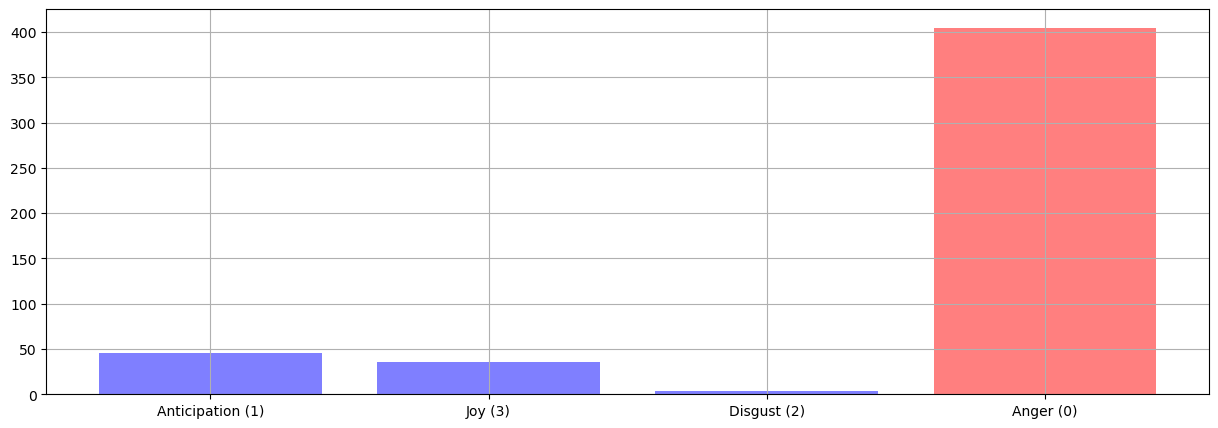

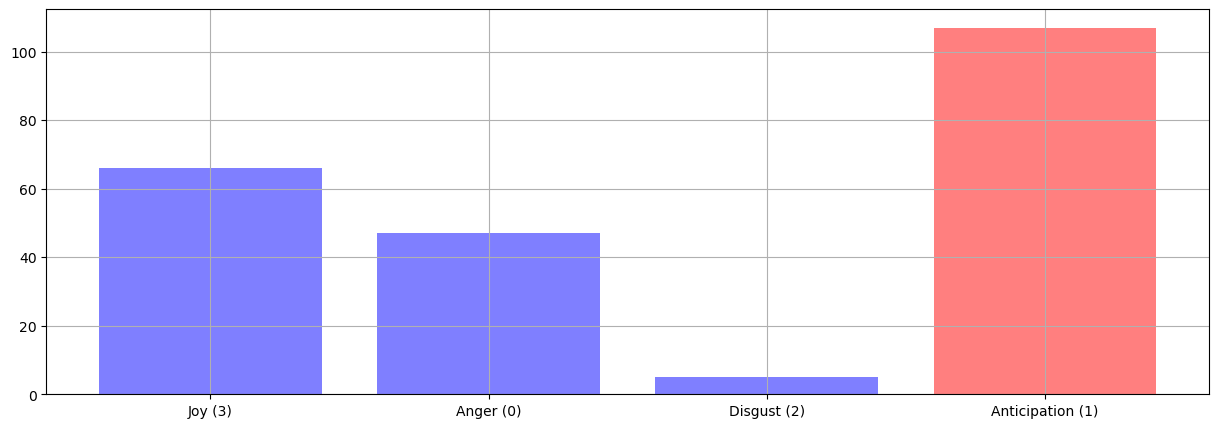

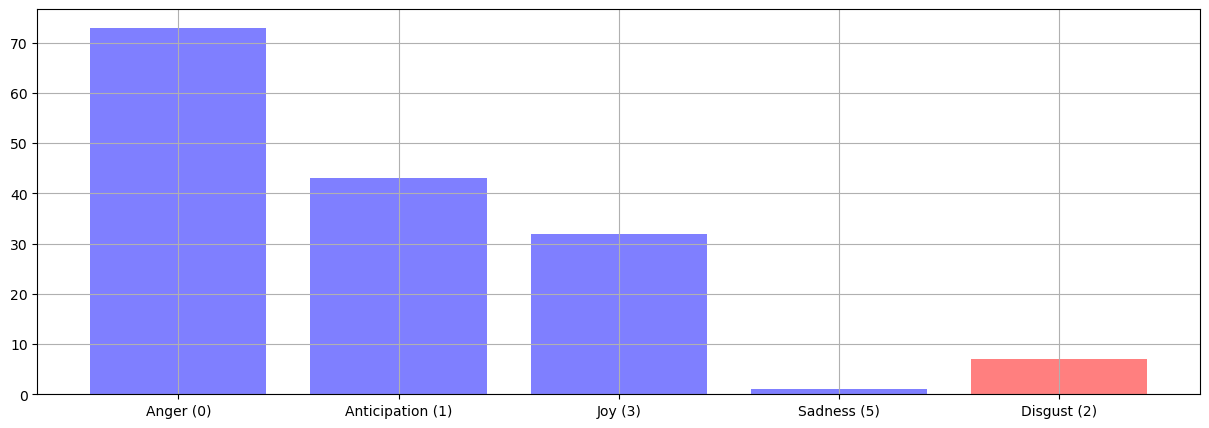

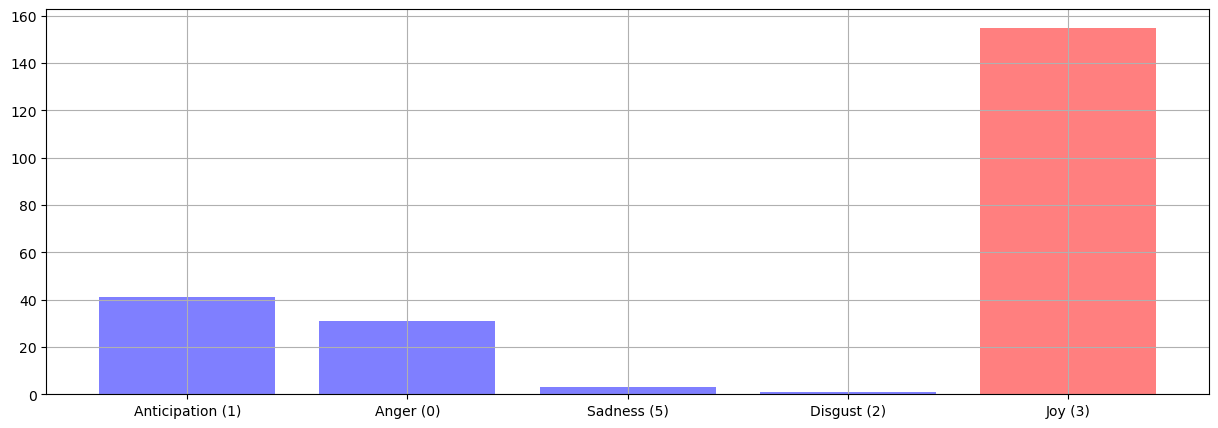

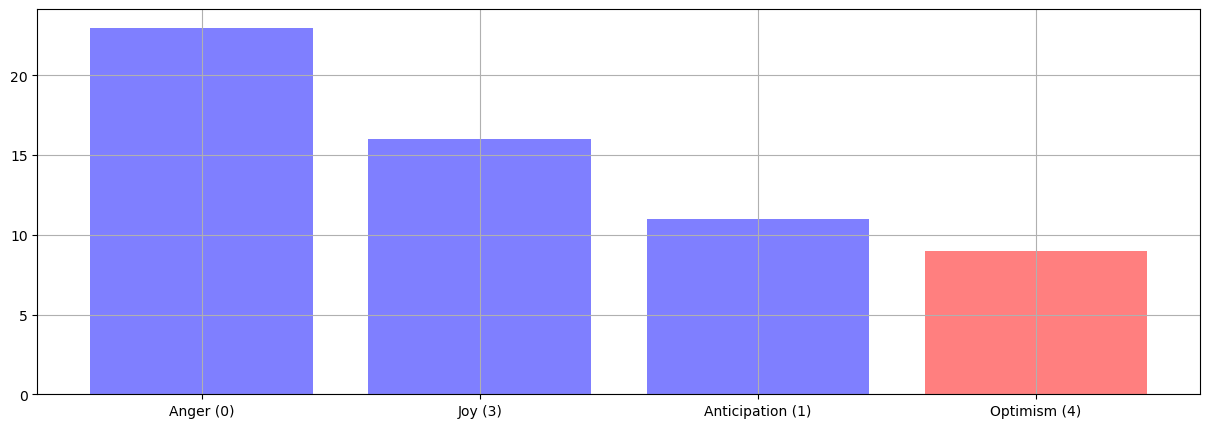

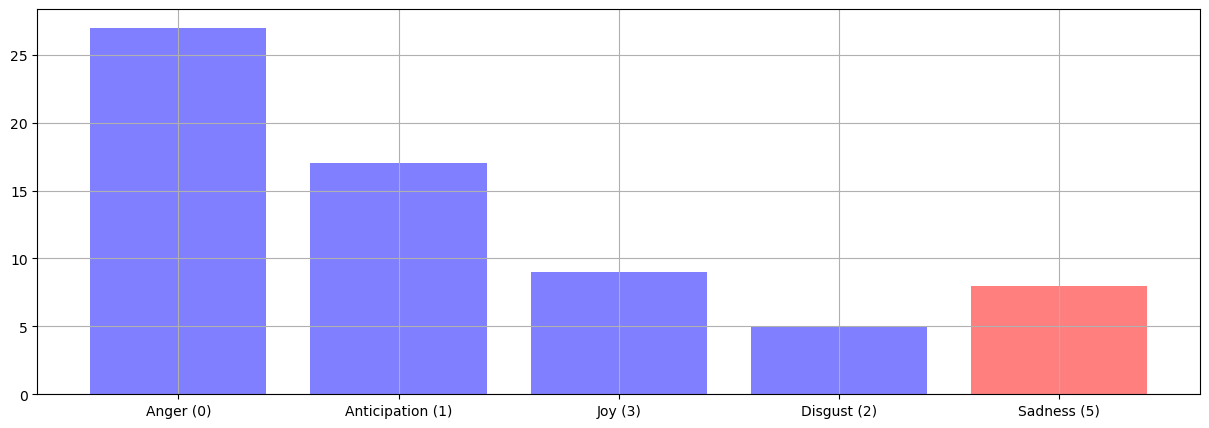

In [13]:
# FALLOS DE ANGER

fig = plt.figure(figsize = (15, 5))

plt.bar(["Anticipation (1)", "Joy (3)", "Disgust (2)"],
        df_pred[(df_pred['Emociones'] == 0) & (df_pred["Pred. Emo."] != 0)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Anger (0)",
        df_pred[(df_pred['Emociones'] == 0) & (df_pred["Pred. Emo."] == 0)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DE ANTICIPATION

fig = plt.figure(figsize = (15, 5))

plt.bar(["Joy (3)", "Anger (0)", "Disgust (2)"],
        df_pred[(df_pred['Emociones'] == 1) & (df_pred["Pred. Emo."] != 1)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Anticipation (1)",
        df_pred[(df_pred['Emociones'] == 1) & (df_pred["Pred. Emo."] == 1)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DE DISGUST

fig = plt.figure(figsize = (15, 5))

plt.bar(["Anger (0)", "Anticipation (1)", "Joy (3)", "Sadness (5)"],
        df_pred[(df_pred['Emociones'] == 2) & (df_pred["Pred. Emo."] != 2)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Disgust (2)",
        df_pred[(df_pred['Emociones'] == 2) & (df_pred["Pred. Emo."] == 2)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DE JOY

fig = plt.figure(figsize = (15, 5))

plt.bar(["Anticipation (1)", "Anger (0)", "Sadness (5)", "Disgust (2)"],
        df_pred[(df_pred['Emociones'] == 3) & (df_pred["Pred. Emo."] != 3)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Joy (3)",
        df_pred[(df_pred['Emociones'] == 3) & (df_pred["Pred. Emo."] == 3)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DE OPTIMISM

fig = plt.figure(figsize = (15, 5))

plt.bar(["Anger (0)", "Joy (3)", "Anticipation (1)"],
        df_pred[(df_pred['Emociones'] == 4) & (df_pred["Pred. Emo."] != 4)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Optimism (4)",
        df_pred[(df_pred['Emociones'] == 4) & (df_pred["Pred. Emo."] == 4)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

# FALLOS DE SADNESS

fig = plt.figure(figsize = (15, 5))

plt.bar(["Anger (0)", "Anticipation (1)", "Joy (3)", "Disgust (2)"],
        df_pred[(df_pred['Emociones'] == 5) & (df_pred["Pred. Emo."] != 5)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "blue")
plt.bar("Sadness (5)",
        df_pred[(df_pred['Emociones'] == 5) & (df_pred["Pred. Emo."] == 5)]["Pred. Emo."].value_counts(),
        alpha = 0.5,
        color = "red")

plt.grid()
plt.show()

## Storytelling

- Desafíos y resolución de cada desafío.
    - El dataset original tenía mucha información que no era útil o relevante.
        - Establecimos varios filtros (condicionales, Stopwords, Stemming, etc.) para quedarnos con los datos que considerábamos relevantes
        - Eliminamos varias columnas irrelevantes.
    - La dificultad de trabajar con texto y conseguir variables que se relación entre sí para entrenar a los modelos.
        - Eliminamos columnas que, aunque ayudaban a categorizar, no podíamos contar con ellas para predecir Tweets nuevos (que no fueran parte del dataset original).
        - Tuvimos cuidado con los filtros para no eliminar demasiadas palabras "sin sentido", propias de las redes sociales, si se repetían más de 1 vez ya que necesitábamos la mayor cantidad de variables para hacer una predicción lo más acertada posible.
    - Encontramos un desbalance en la cantidad de valores por categorías.
        - Utilizamos SMOTE para balancear, lo mejor posible, sin alterar significativamente las proporciones.
        - Eliminamos, en la predicción de las emociones, las dos categorías con menor representación (fear, surprise) ya que las podíamos considerar casi "outliers".
    - En el momento de hacer "Tuning" y validar los modelos, por la naturaleza del proyecto (NLP), la cantidad de columnas impedía poder hacer un GridSearchCV intensivo en el que podamos explorar un gran número de "fits".
        - Tuvimos que reducir la cantidad de parámetros diferentes para probar (max_depth, max_leaves_nodes, etc.)
        - Quitamos el parámetro min_impurity_decrease ya que, por la naturaleza del proyecto, no permitía llegar a la profundidad requerida.
        - No pudimos contar con Kaggle ya que se saturaban sus procesadores un su versión gratuita.
        
- Conclusión.
    - Después de comparar los resultados de los modelos que predicen los sentimientos y las emociones hemos podido observar que es más fiable a la hora de predecir el primero de estos. Podemos concluir que es más sencillo categorizar los Tweets como negativos, neutros o positivos que por sus emociones ya que los agrupa de manera más eficaz teniendo menos dimensiones.

In [14]:
###########################################################final###########################################################